In [1]:
import numpy as np
from typing import Tuple
import networkx as nx

In [2]:
from tnestmodel.temp_fast_graph import SparseTempFastGraph, FastGraph, get_total_degree, TempFastGraph
from tnestmodel.visualization import draw_networkx_causal, draw_networkx_temp, to_color

In [3]:
edges0 = np.array([(0,1),[2,1]], dtype=np.uint32)
edges1 = np.array([[1,2], (2,3)], dtype=np.uint32)
edges2 = np.array([[2,3]], dtype=np.uint32)
edges3 = np.array([[0,1],[1,2], [2,0]], dtype=np.uint32)
G = SparseTempFastGraph([edges0.copy(), edges1.copy(), edges2, edges3, edges0], is_directed=False)
G2 = TempFastGraph([edges0.copy(), edges1.copy(), edges2, edges3, edges0], is_directed=False)

In [4]:
from numpy import array, int64
import matplotlib.pyplot as plt

In [5]:
G = SparseTempFastGraph.from_temporal_edges(np.array([[0, 2, 0],
       [3, 4, 0],
       [2, 4, 0],
       [1, 2, 1],
       [5, 4, 1],
       [0, 2, 1],
       [3, 4, 1],
       [1, 5, 2],
       [2, 4, 2]], dtype=int64),
                                        is_directed=False)
G = G.to_dense()


In [37]:
G2 = SparseTempFastGraph.from_temporal_edges(np.array([[0, 4, 0],
       [3, 2, 0],
       [2, 4, 0],
       [1, 2, 1],
       [5, 4, 1],
       [0, 4, 1],
       [2, 3, 1],
       [1, 2, 2],
       [4, 5, 2]], dtype=int64),
                                        is_directed=False)
G2 = G2.to_dense()

In [38]:
from nestmodel.visualization import get_familiy_node_colors_for_partition
def get_cmap(G, depth, strength=200):
    identifiers, partitions = G.get_all_partitions()
    nodes_to_colors = get_familiy_node_colors_for_partition(partitions, depth, strength)
    return {a : b for a,b in zip(partitions[depth, :], nodes_to_colors)}

In [39]:
get_cmap(G, 0)

{0: 'gray'}

In [40]:
get_cmap(G, 1)

{0: '#a2cffe', 1: '#fe7b7c', 2: '#aaff32', 3: '#ffff14', 4: '#DDA0DD'}

In [41]:
#get_familiy_node_colors_for_partition(partitions, 0, 100)

In [58]:
def plot(G, colors=None, prefix="base", colormap=None, save=False):
    transpose=False
    if transpose:
        plt.figure(figsize=(5,2.75))
    else:
        plt.figure(figsize=(2.75,5))
        pass
        
    draw_networkx_temp(G, transpose=transpose, colors=colors, colormap=colormap, connectionstyle="arc3,rad=0.27", width=2.0)
    plt.box(False)
    if colors is None:
        colors=0
        
    if transpose:
        a, b = plt.gca().get_ylim()
        plt.ylim(a-0.5, b+0.2)
    else:
        a, b = plt.gca().get_xlim()
        plt.xlim(a-0.5, b+0.3)
    if save:
        plt.savefig(f"./Figure1/{prefix}_{colors}.pdf", transparent=True, bbox_inches="tight")
        plt.savefig(f"./Figure1/{prefix}_{colors}.svg", transparent=True, bbox_inches="tight")
        plt.savefig(f"./Figure1/{prefix}_{colors}.png", transparent=True, bbox_inches="tight", dpi=600)

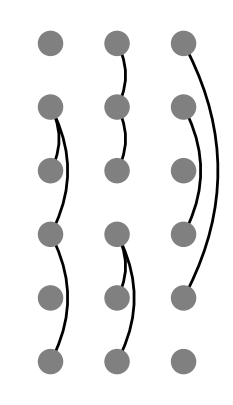

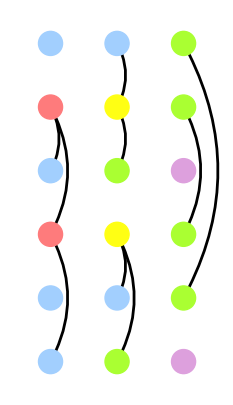

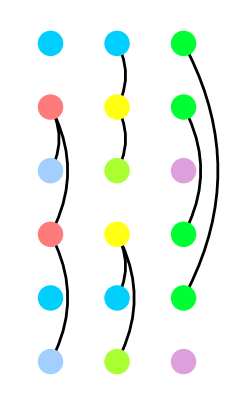

In [60]:
for depth in range(3):
    plot(G, colors = depth, colormap=get_cmap(G, depth), save=True)
    plt.show()

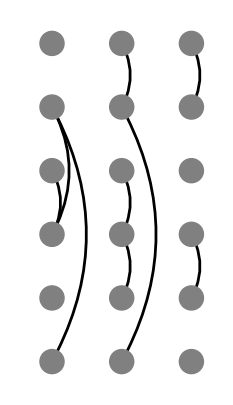

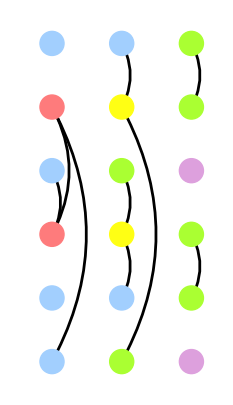

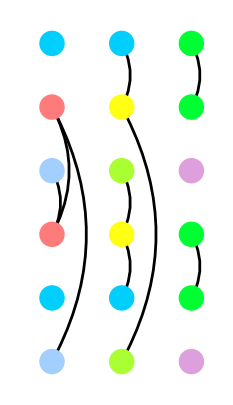

In [63]:
for depth in range(3):
    plot(G2, colors = depth, colormap=get_cmap(G, depth), prefix="/other/", save=True)
    plt.show()

In [ ]:
draw_networkx_temp(G, colors = 1)

In [ ]:
draw_networkx_temp(G, colors = 1)

In [ ]:
draw_networkx_causal(G.get_sparse_causal_completion(), colors=1)

In [ ]:
from tnestmodel.visualization import to_color
import networkx as nx

In [ ]:
draw_networkx_causal(G2.get_causal_completion(), labels=False, colors=1)

In [ ]:
edges0 = np.array([[0,1], [1,2]], dtype=np.uint32)
edges1 = np.array([[1,2]], dtype=np.uint32)
edges2 = np.array([[0,1], [1,2]], dtype=np.uint32)
edges3 = np.array([[0,1]], dtype=np.uint32)
G3 = SparseTempFastGraph([edges0, edges1, edges2, edges3, edges1], is_directed=True)
G3_d = TempFastGraph([edges0, edges1, edges2, edges3, edges1], is_directed=True)

In [ ]:
draw_networkx_temp(G3)

In [ ]:
draw_networkx_causal(G3.get_sparse_causal_completion())

In [ ]:
draw_networkx_causal(G3.get_sparse_causal_completion(), labels=True)

In [ ]:
G3_d.r = 2
draw_networkx_causal(G3_d.get_restless_causal_completion(), labels=False)

In [ ]:
G3_d.r = 3
draw_networkx_causal(G3_d.get_restless_causal_completion(), labels=False)